# Birth Rate Plot Per Country

Importing Libraries

In [2]:
import requests
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import json

In [40]:
url = 'https://api.census.gov/data/timeseries/idb/1year?get=NAME,AGE,POP,AREA_KM2&GENC=NO&YR=2021&SEX=0'
response = requests.get(url)
data = response.json()
print(data)

[['NAME', 'AGE', 'POP', 'AREA_KM2', 'GENC', 'YR', 'SEX'], ['Norway', '0', '66575', '304282', 'NO', '2021', '0'], ['Norway', '1', '66697', '304282', 'NO', '2021', '0'], ['Norway', '2', '66709', '304282', 'NO', '2021', '0'], ['Norway', '3', '66605', '304282', 'NO', '2021', '0'], ['Norway', '4', '66411', '304282', 'NO', '2021', '0'], ['Norway', '5', '66053', '304282', 'NO', '2021', '0'], ['Norway', '6', '65575', '304282', 'NO', '2021', '0'], ['Norway', '7', '65084', '304282', 'NO', '2021', '0'], ['Norway', '8', '64619', '304282', 'NO', '2021', '0'], ['Norway', '9', '64661', '304282', 'NO', '2021', '0'], ['Norway', '10', '65651', '304282', 'NO', '2021', '0'], ['Norway', '11', '66751', '304282', 'NO', '2021', '0'], ['Norway', '12', '66559', '304282', 'NO', '2021', '0'], ['Norway', '13', '65255', '304282', 'NO', '2021', '0'], ['Norway', '14', '64573', '304282', 'NO', '2021', '0'], ['Norway', '15', '63862', '304282', 'NO', '2021', '0'], ['Norway', '16', '63205', '304282', 'NO', '2021', '0'], 

Now we can access the dat by INDEXING

In [39]:
print(data[0])

['NAME', 'AGE', 'POP', 'AREA_KM2', 'GENC', 'YR', 'SEX']


Turning the JSON data into a TABLE

In [50]:
df1 = pd.DataFrame(data, columns=data[0])
df2 = df1.drop(index=[0])
# df2.head(10)

# PROBLEMS

1. DataTypes of all the columns are OBJECT means string. So we can not perform logical operations.

2. AGE columns means the year(YR - AGE). We have to perform some operations for better understanding

In [56]:
# YEAR function will simply perform a mathemetical operation to get the year.
def year(x):
    return 2021 - int(x)
df3 = pd.DataFrame(columns=['Year', 'Population'])
df3['Year'] = df2['AGE'].apply(year)
# Converting the POPULATION column into INTEGER
df3['Population'] = df2['POP'].apply(lambda x: int(x))
print(df3.head(2))

   Year  Population
1  2021       66575
2  2020       66697


# PLOT THE GRAPH BY MATPLOTLIB

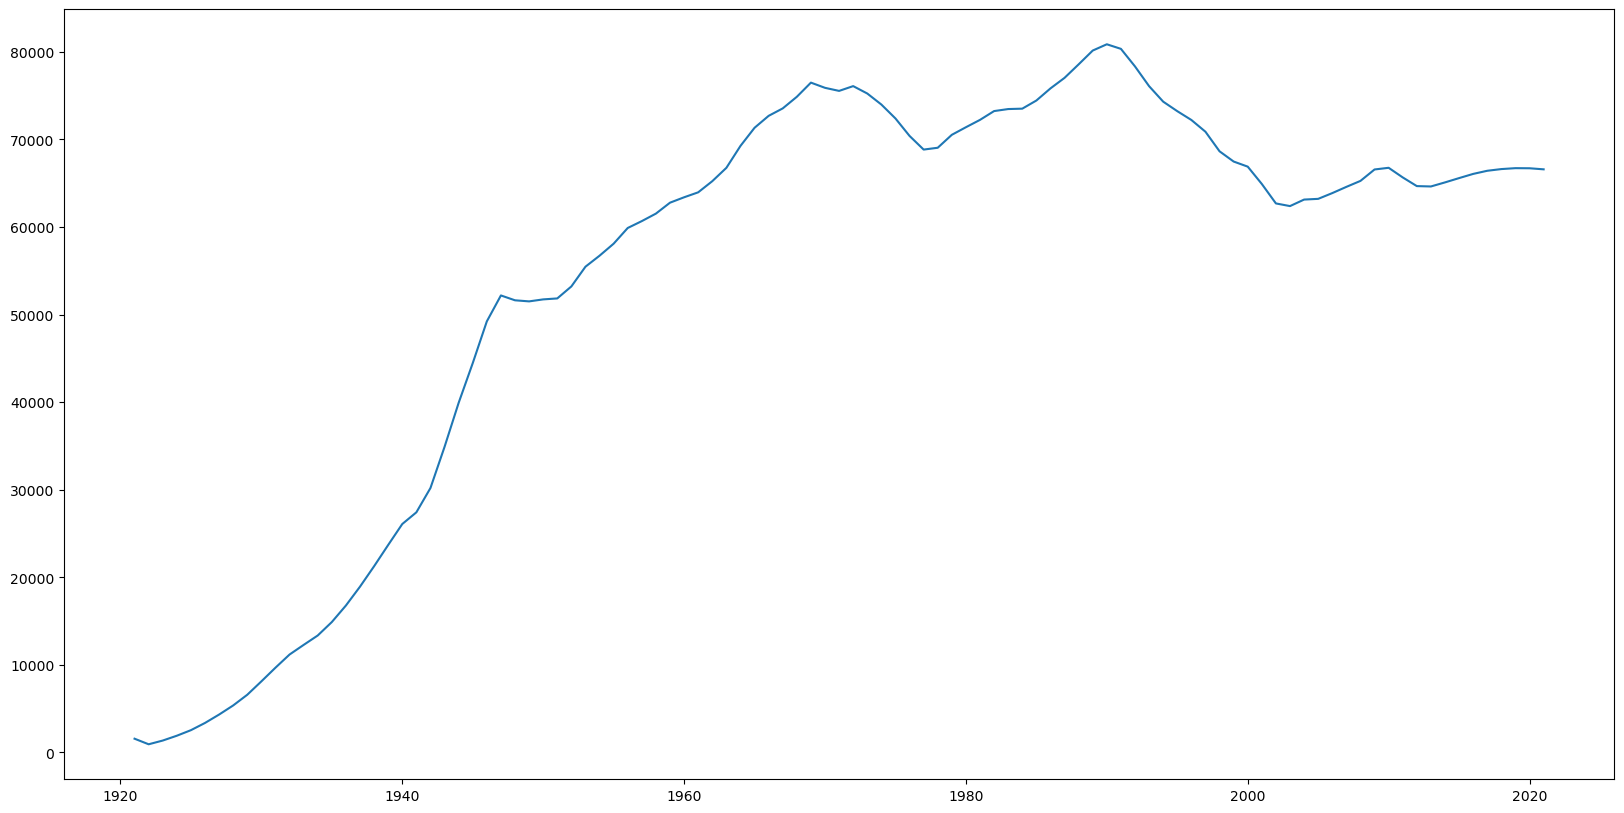

In [58]:
plt.figure(figsize=(20,10))
plt.plot(df3['Year'], df3['Population'])
plt.show()

# PLOT THE GRAPH BY SEABORN

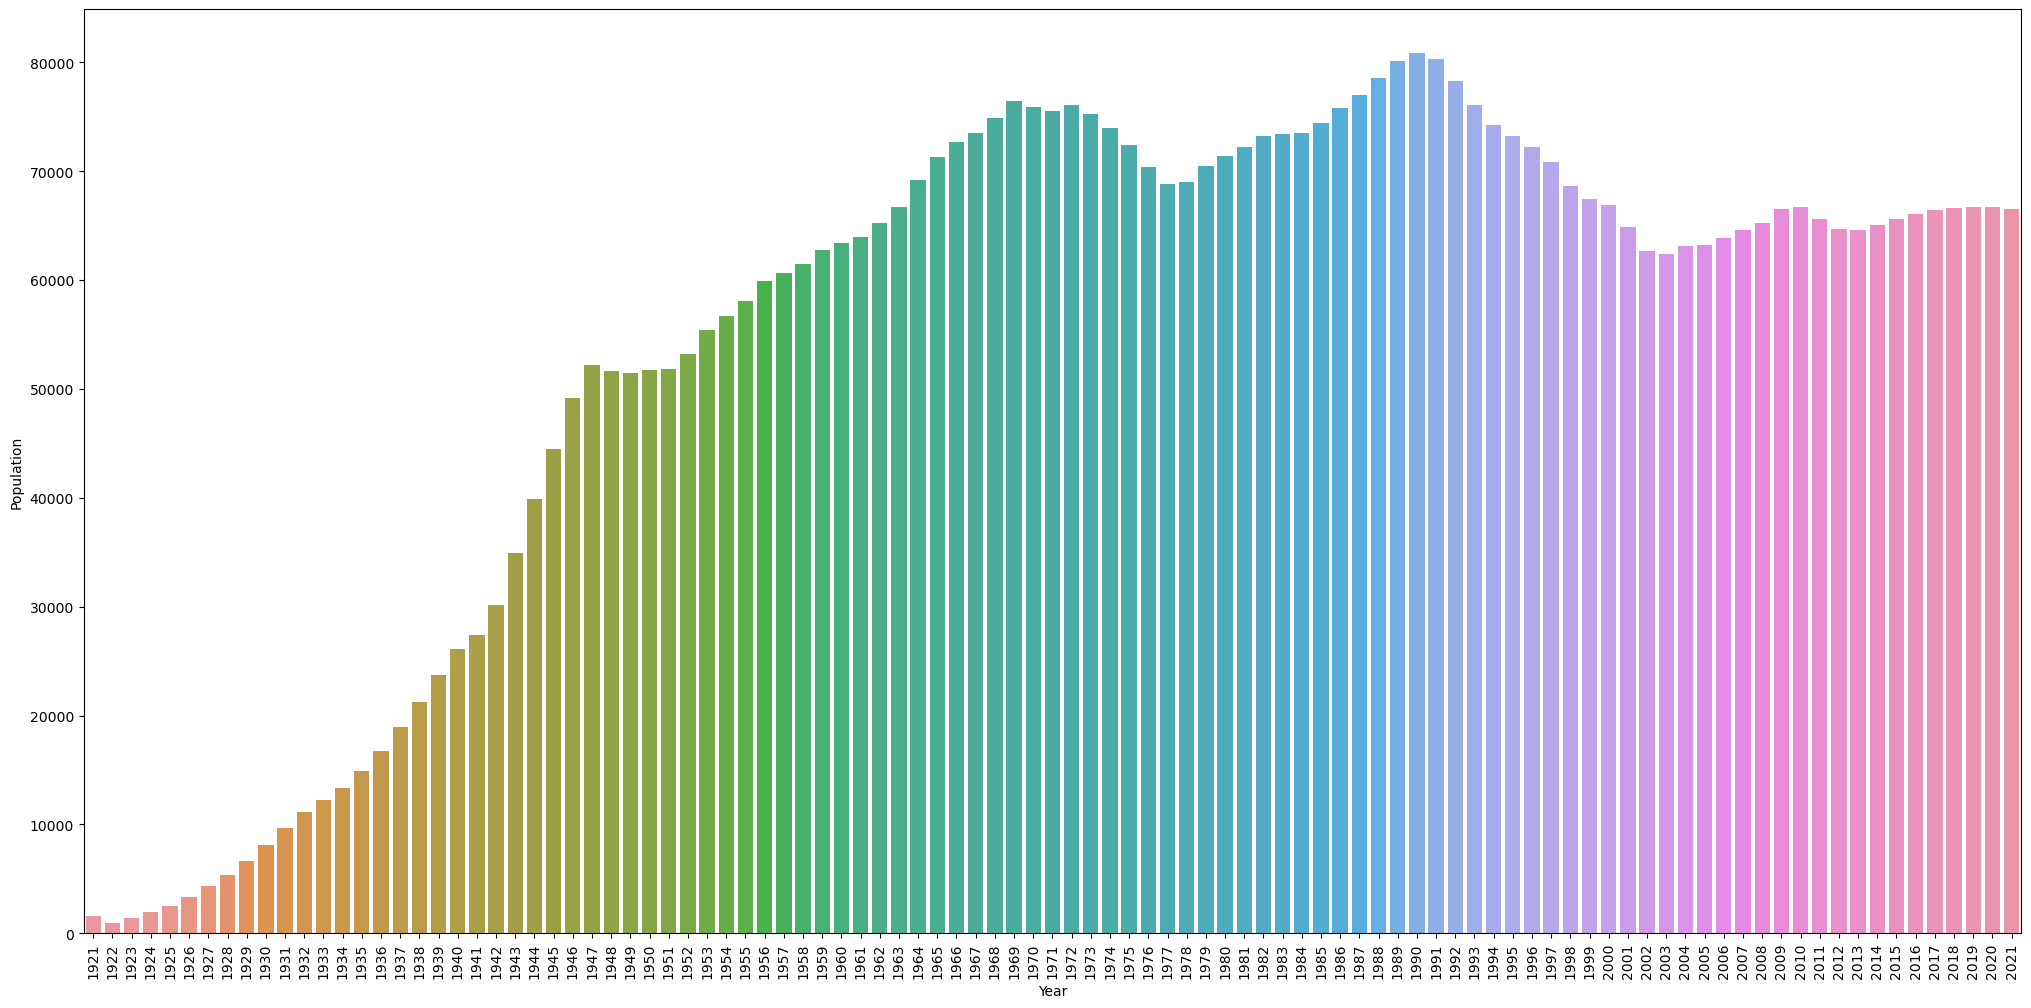

In [72]:
plt.figure(figsize=(25,12))
sn.barplot(data=df3, x='Year', y='Population')
plt.xticks(rotation=90)
plt.show()